# Bike Sharing Case Study
___

## We will take following step wise approach:
1. Exploratory Data Analytics
    - 1.1 Data Sourcing and Understanding
    - 1.2 Data Cleaning
    - 1.3 Outlier Treatment
    - 1.4 Derive Metrics
    - 1.5 Univariate Analysis
    - 1.6 Multivariate Analysis
2. Data Preparation:
    - 2.1 Categorical: Create Dummy Variables
    - 2.2 Numeric: Rescaling
3. Model Builiding:
    -  Reduction with RFE in case of high number of variables
    -  VIF and p-value - Identification of significant columns
4. Model Analysis/Accuracy:
    - Final R2 Score on Training Data
    - Verification of assumptions of Linear Regression
        - Residual Analysis
5. Model Prediction and evaluation (on test data)
    - Final R2 Score on Test Data
    - Resedual Analysis
___

___ 
### 1.1 Data Sourcing, Business Understanding and Assumptions
- Data has been sourced from Bike Sharing Company
- Company wants to understand
    - Which variables/features are significant in predicting the demand for shared bikes
    - How well those variables describe the bike demands
    
___

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

import itertools
import datetime

#### Import Data

In [2]:
bikes = pd.read_csv('day.csv', parse_dates=['dteday'])
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Observation: 
* No null values
___

### 1.2 Data Cleaning

In [5]:
bikes.dteday = pd.DatetimeIndex(bikes.dteday)

In [6]:
# 1. Dropping 'instant' column since this is an ID column, and we are solving a regression problem hence we do not need it as it would not show any trend
# 2. Dropping  'casual' column since this is could just be another dependent column but will only skew the results  

bikes.drop(columns= ['instant', 'casual','registered'], inplace=True)


In [7]:
bikes.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Following columns look like categorical but are numerical:
-  "season" ,"yr" ,"mnth" ,"holiday" ,"weekday" ,"workingday" ,"weathersit" 

In [8]:
cat_cols = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
bikeunique = []
for i in cat_cols:
    bikeunique.append(bikes[i].unique())

pd.DataFrame(zip(cat_cols,bikeunique), columns=['Columns','Unique Values'])

,Columns,Unique Values
0,season,"[1, 2, 3, 4]"
1,yr,"[0, 1]"
2,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
3,holiday,"[0, 1]"
4,weekday,"[6, 0, 1, 2, 3, 4, 5]"
5,workingday,"[0, 1]"
6,weathersit,"[2, 1, 3]"


#### Replacing the values to categories using data definitions

In [9]:
bikes.season     = bikes.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
bikes.yr         = bikes.yr.map({0: '2018', 1: '2019'})
bikes.mnth       = bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes.weathersit = bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikes.weekday    = bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [10]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2018-02-01,Spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,2018-03-01,Spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,2018-04-01,Spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,2018-05-01,Spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Verifying dates are in expected range:

In [11]:
print("Minimum and Maximum values of Date are: \n", bikes.dteday.min(),"; ", bikes.dteday.max())

Minimum and Maximum values of Date are: 
 2018-01-01 00:00:00 ;  2019-12-31 00:00:00


___
### 1.3 Outlier Treatment 

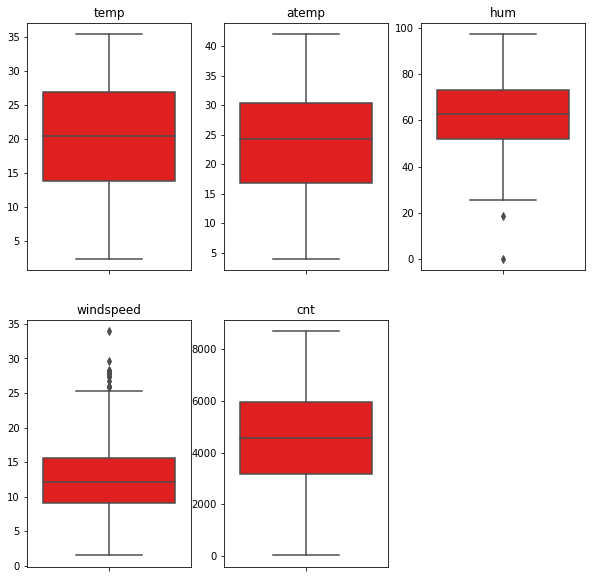

In [12]:
outlier_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#'registered',

plt.figure(figsize=[10,10])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(2,3,j+1)
    ax = sns.boxplot(y = bikes[i], color='red')
    ax.set(ylabel=None)
    plt.title(i)

* Humidity has one extream oulier that has value 0
* Windspeed also has an extream outlier
    * Let's check if the records are valid and fix those!


In [13]:
windspped_quant = bikes.windspeed.quantile([0.5, 0.7, 0.8, 0.9, 0.95, 0.975,0.99, 0.995,1])
windspped_quant

0.500    12.125325
0.700    14.971271
0.800    16.639785
0.900    19.833997
0.950    22.999988
0.975    24.443863
0.990    27.380948
0.995    28.088649
1.000    34.000021
Name: windspeed, dtype: float64

In [14]:
bikes.hum = np.where(bikes.hum == 0, bikes.hum.mean(), bikes.hum)
#bikes.windspeed = np.where((bikes.windspeed > bikes.windspeed.quantile(0.995)), bikes.windspeed.mean(), bikes.windspeed)

___


### 1.4 Derive Metrics 

In [15]:
bikes[['temp','hum','windspeed']].describe()

,temp,hum,windspeed
count,730.000000,730.000000,730.000000
mean,20.319259,62.851155,12.763620
std,7.506729,14.046267,5.195841
min,2.424346,18.791700,1.500244
25%,13.811885,52.052075,9.041650
50%,20.465826,62.708350,12.125325
75%,26.880615,72.989575,15.625589
max,35.328347,97.250000,34.000021


In [16]:
bikes['yr_mnth'] = bikes['yr'] + '_' +bikes['mnth']

In [17]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,yr_mnth
0,2018-01-01,Spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018_Jan
1,2018-02-01,Spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018_Jan
2,2018-03-01,Spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018_Jan
3,2018-04-01,Spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018_Jan
4,2018-05-01,Spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018_Jan


___
### 1.5 Univariate Analysis 

With target variable - 'cnt'

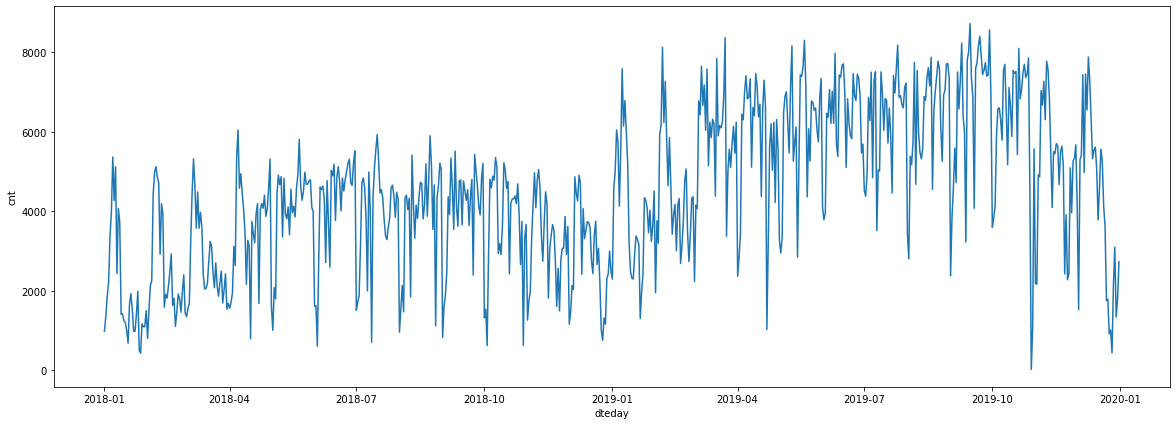

In [18]:
plt.figure(figsize=(20,7))
sns.lineplot(data = bikes, x='dteday',y='cnt')
plt.show()

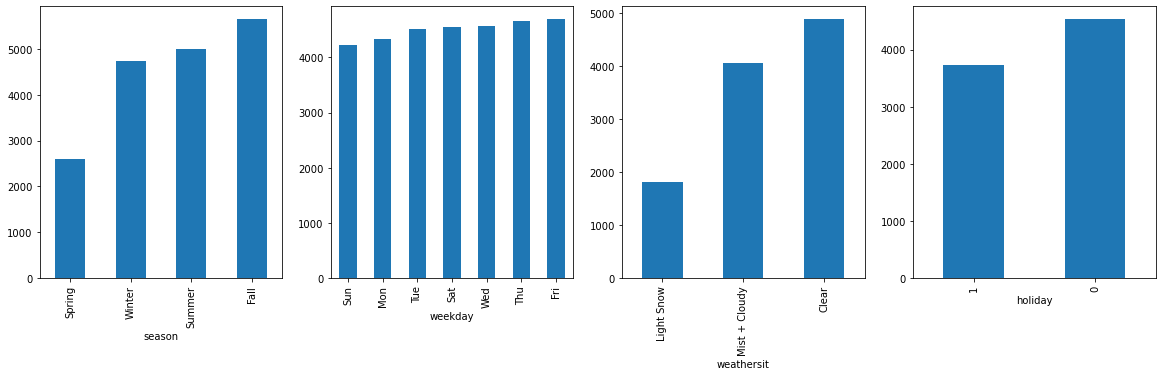

In [19]:
list_cat = ['season', 'weekday', 'weathersit','holiday']
list_cat_ax = ['ax1','ax2','ax3','ax4']

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows =1, ncols = int(len(list_cat_ax)))


for i,j in itertools.zip_longest(list_cat,list_cat_ax):
    bikes.groupby(by=i)['cnt'].mean().sort_values().plot(kind='bar', ax=eval(j), figsize = (20,5))

plt.show()

#### Observations: 
- __Seasons__ do seem to __have an effect__ on Ride Count
- Users __prefer__ to ride when it is __not holiday__ as well as __on weekdays__ when __weather is clear__
- One can hypothesize that __people are riding rental bikes to go to offices when weather is clear__
___

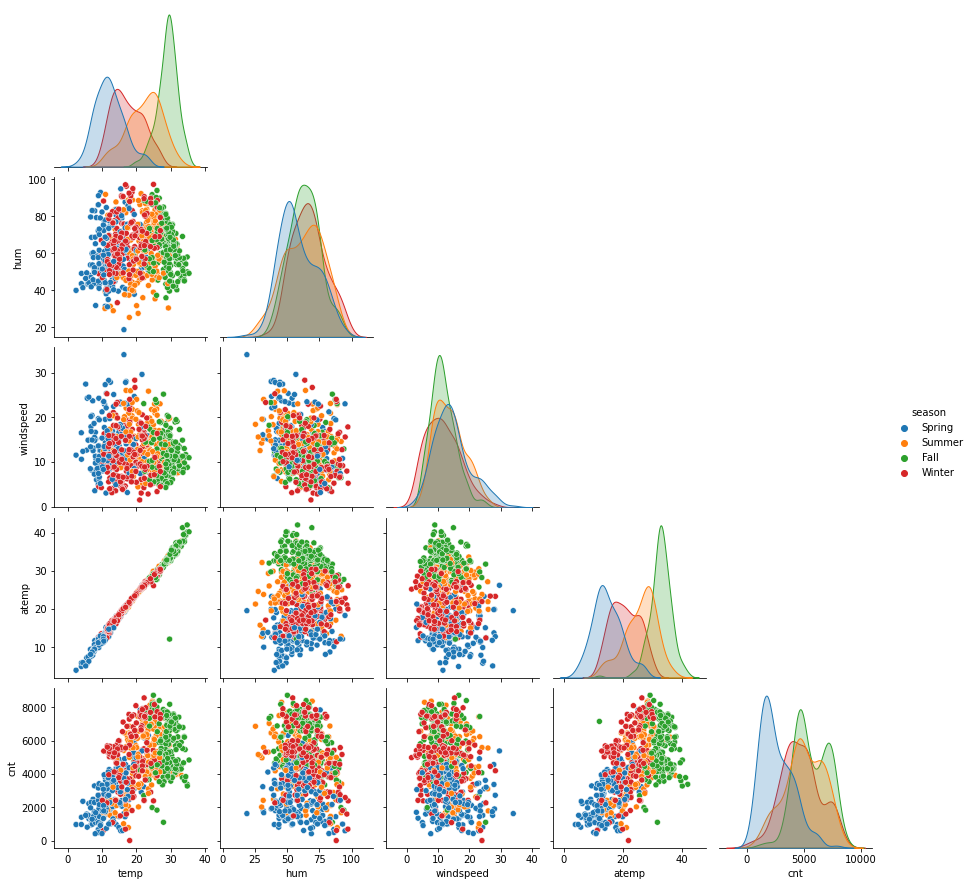

In [20]:
var1= ['temp', 'hum','windspeed','atemp','cnt']
#,'registered'

sns.pairplot(bikes, vars= var1, corner = True, hue = 'season')
plt.show()

#### Insights: 
- There is a __visibly high correlation between 'atemp' and 'temp'__ which is very intivitive since both describe about the same information
- There seems to be __direct relation of temprature with count of rides__ 
    - __Temp is most important factor__, so a final model should always contain it.

___

#### Let's verify aforesaid insights with correlation metrix

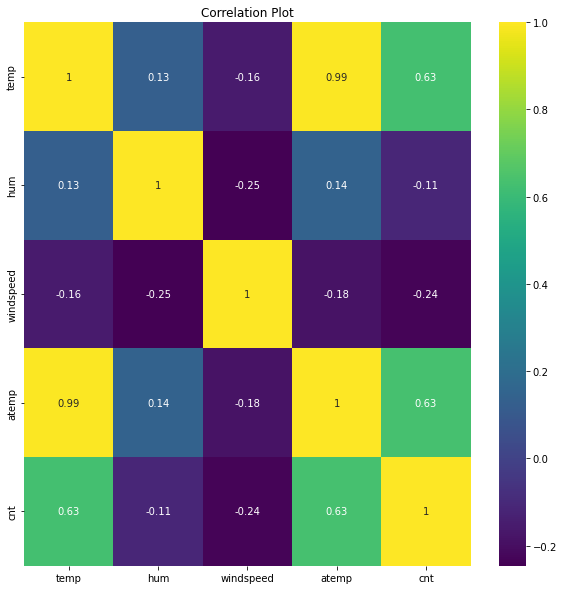

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(bikes[var1].corr(), annot=True, cmap = 'viridis')
plt.title('Correlation Plot')
plt.show()

#### Let's hence delete the highly correlated features 

In [22]:
bikes.drop(columns=['atemp'], inplace=True)

___
### 1.6 Multivariate Analysis

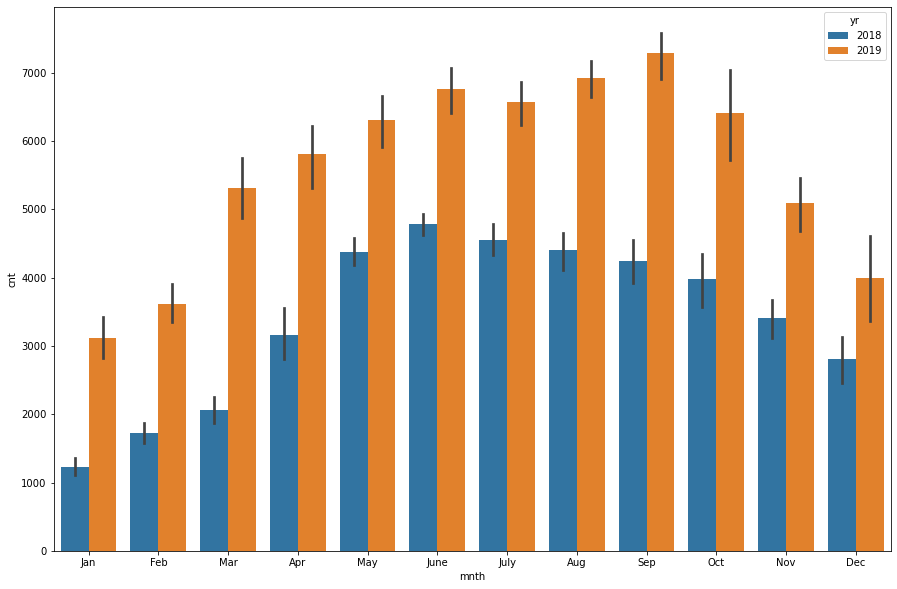

In [23]:
plt.figure(figsize=(15,10))
sns.barplot('mnth','cnt',hue='yr',data=bikes)#,palette='Paired')
plt.show()

#### Obervations:
- Trends in both the years are different, 2018 had peak in and around June, while 2019 had the same around September
- On an average and on a sum 2019 was a better year in terms of bike rides

___

## 2. Data Prep

### 2.1 Categorical : Create Dummy variables

In [24]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  cnt         730 non-null    int64         
 12  yr_mnth     730 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 74.3+ KB


In [25]:
bikes.columns[bikes.dtypes == object].to_list()

['season', 'yr', 'mnth', 'weekday', 'weathersit', 'yr_mnth']

In [26]:

bikes_dummy = bikes.copy()

season = pd.get_dummies(bikes_dummy.season,drop_first=True)
yr = pd.get_dummies(bikes_dummy.yr,drop_first=True)
mnth = pd.get_dummies(bikes_dummy.mnth,drop_first=True)
weekday = pd.get_dummies(bikes_dummy.weekday,drop_first=True)
weathersit = pd.get_dummies(bikes_dummy.weathersit,drop_first=True)

bikes_dummy = pd.concat([bikes_dummy,season,weathersit,weekday,yr,mnth], axis =1)


In [27]:
bikes_dummy.drop(columns= ['season','weekday','weathersit', 'yr_mnth','dteday','weekday','yr','mnth'], inplace=True)


In [28]:
bikes_dummy.head()

,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 2.2 Rescaling

In [29]:
bike_train, bike_test = train_test_split(bikes_dummy,train_size = 0.7, random_state = 100)
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


#### Min Max Scaling

In [30]:
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
576,0,1,0.815169,0.659744,0.264686,0.827658,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.553780,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0.245101,0.377528,0.663106,0.204096,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.385516,0.188475,0.482973,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,1,0.345824,0.692225,0.380981,0.191095,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
bike_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.568116,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.157763,0.468282,0.225858,0.177295,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.428913,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.570553,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.695953,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


___
## 3. Building a Model

#### Rechecking the Correlation 

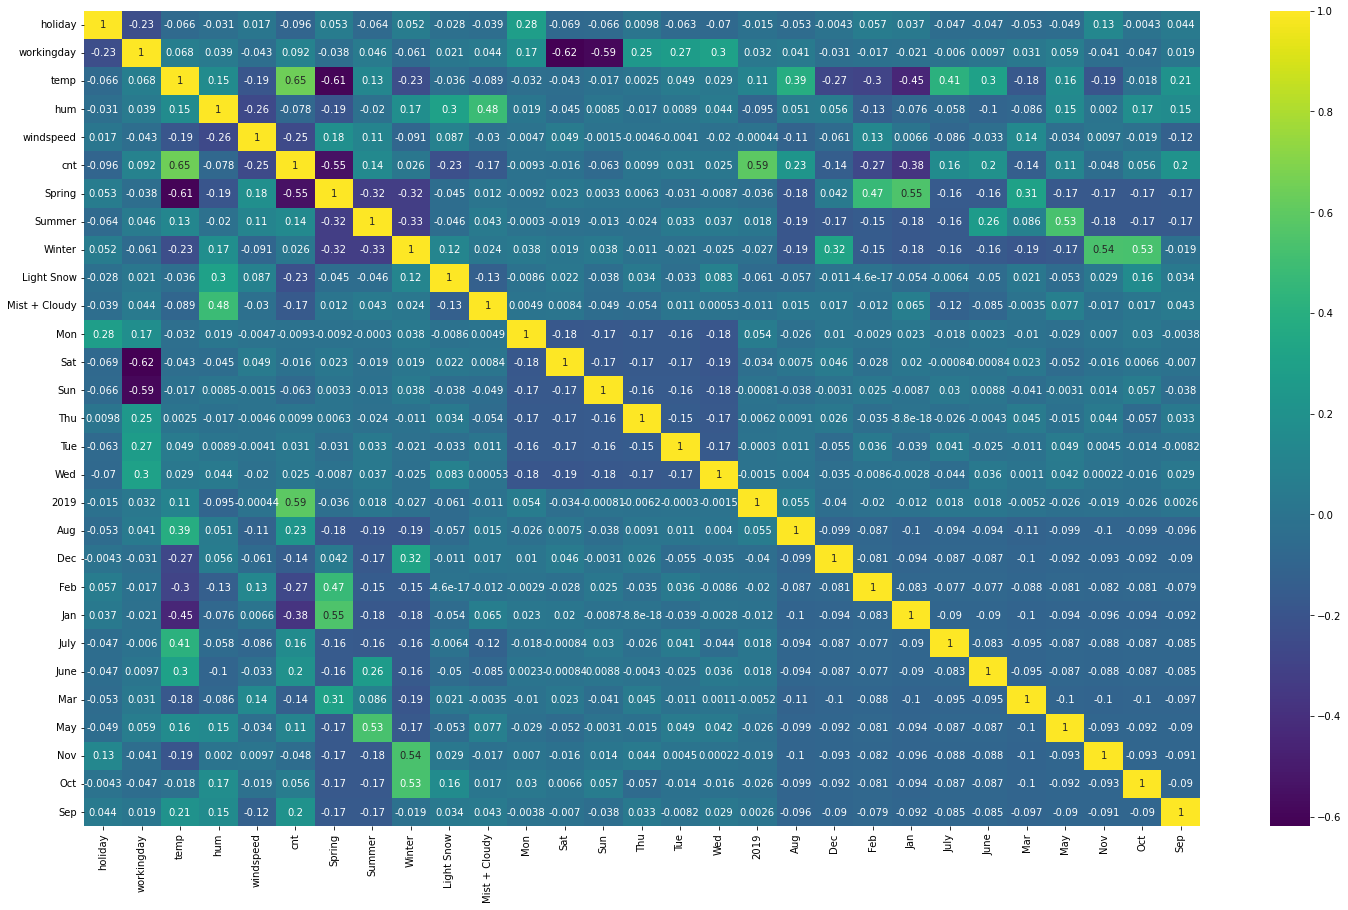

In [32]:
plt.figure(figsize = (25,15))
sns.heatmap(bike_train.corr(),annot = True, cmap = "viridis")
plt.show()

### We have 29 columns/features in data set, it is not practicle to go through each of those
### Hence, let us just identify top 15 features using RFE and further go through these all

#### Create arrays of dependent and independent variables 

In [33]:
y_train = bike_train.pop('cnt')
X_train = bike_train

### 3.1 RFE (Recursive Feature Elimination)

In [34]:
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by = 'Ranking')

,Predictor,Select Status,Ranking
0,holiday,True,1
21,July,True,1
20,Jan,True,1
16,2019,True,1
11,Sat,True,1
9,Mist + Cloudy,True,1
8,Light Snow,True,1
27,Sep,True,1
6,Summer,True,1
5,Spring,True,1


In [35]:
top_cols = rfe_df.Predictor[rfe_df.Ranking==1].to_list()

In [36]:
X_train = bike_train[top_cols]

### 3.2 Stats Model - Identification of affecting independent features

#### Using __Stats Model__ for modeling so that we can decide best parameters based on VIF and p value in summary

In [37]:
def model_summary(j):
    X_train_sm = sm.add_constant(j)
    mlr = sm.OLS(y_train, X_train_sm)
    mlr_model = mlr.fit()
    return mlr_model.summary()


def vif_func(k):
    vif = pd.DataFrame()
    vif['Features'] = k.columns
    vif['VIF'] = [variance_inflation_factor(k.values, i) for i in range(k.shape[1])]
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

### 3.2.1. Model I 

In [38]:
model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.91e-191
Time:                        10:07:32   Log-Likelihood:                 519.72
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2238      0.033      6.749      0.000       0.159       0.289
holiday          -0.0583      0.027     -2.169      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.759      0.000       0.021       0.066
temp              0.5139      0.035     14.848      0.000       0.446       0.582
hum              -0.1350      0.032     -4.207      0.000      -0.198      -0.072
windspeed        -0.1885      0.026     -7.356      0.000      -0.239      -0.138
Spring           -0.0483      0.021     -2.330      0.020      -0.089      -0.008
Summer            0.0515      0.015      3.468      0.001       0.022       0.081
Winter            0.0945      0.017      5.456      0.000       0.060       0.129
Light Snow       -0.2370      0.027     -8.749      0.000      -0.290      -0.184
Mist + Cloudy    -0.0545      0.011     -5.144      0.000      -0.075      -0.034
Sat               0.0530      0.015      3.656      0.000       0.025       0.082
2019              0.2299      0.008     28.665      0.000       0.214       0.246
Jan              -0.0352      0.017     -2.028      0.043      -0.069      -0.001
July             -0.0535      0.018     -2.961      0.003      -0.089      -0.018
Sep               0.0816      0.016      4.958      0.000       0.049       0.114
==============================================================================
Omnibus:                       66.745   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.475
Skew:                          -0.684   Prob(JB):                     1.42e-35
Kurtosis:                       5.383   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Let's Check VIF for these values:

In [39]:
vif_func(X_train)

,Features,VIF
3,hum,20.562832
2,temp,15.233586
1,workingday,5.258437
4,windspeed,4.857342
5,Spring,4.077760
7,Winter,3.041705
6,Summer,2.676127
9,Mist + Cloudy,2.469237
11,2019,2.101274
10,Sat,1.968360


##### Observations: 'hum' i.e. humidity has p value. Let's drop it

### 3.2.2 Model II

In [40]:
# Let's drop 'sat' since it has both high vif and p value 
X_train.drop(columns = ['hum'], inplace=True)

In [41]:
model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.60e-188
Time:                        10:07:32   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Summer            0.0445      0.015      2.967      0.003       0.015       0.074
Winter            0.0784      0.017      4.562      0.000       0.045       0.112
Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Sat               0.0583      0.015      3.968      0.000       0.029       0.087
2019              0.2345      0.008     29.009      0.000       0.219       0.250
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep               0.0755      0.017      4.527      0.000       0.043       0.108
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif_func(X_train)

,Features,VIF
2,temp,7.070219
1,workingday,5.243195
3,windspeed,4.675805
4,Spring,3.074591
5,Summer,2.340269
10,2019,2.075193
6,Winter,1.977789
9,Sat,1.968247
11,Jan,1.621723
12,July,1.591949


##### Observations: 
- workingday has high p value; Should be deleted
- temp, although it has a high VIF, it has high correlation with cnt, so can not delete

### 3.2.3 Model III

In [43]:
X_train.drop(columns = ['workingday'], inplace=True)

In [44]:
model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.48e-186
Time:                        10:07:32   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2120      0.030      6.978      0.000       0.152       0.272
holiday          -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp              0.4734      0.034     13.837      0.000       0.406       0.541
windspeed        -0.1570      0.025     -6.226      0.000      -0.207      -0.107
Spring           -0.0615      0.021     -2.902      0.004      -0.103      -0.020
Summer            0.0437      0.015      2.871      0.004       0.014       0.074
Winter            0.0755      0.017      4.334      0.000       0.041       0.110
Light Snow       -0.2859      0.025    -11.619      0.000      -0.334      -0.238
Mist + Cloudy    -0.0794      0.009     -9.097      0.000      -0.097      -0.062
Sat               0.0201      0.011      1.787      0.075      -0.002       0.042
2019              0.2347      0.008     28.620      0.000       0.219       0.251
Jan              -0.0386      0.018     -2.159      0.031      -0.074      -0.003
July             -0.0508      0.019     -2.735      0.006      -0.087      -0.014
Sep               0.0762      0.017      4.504      0.000       0.043       0.109
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif_func(X_train)

,Features,VIF
1,temp,5.160964
2,windspeed,4.639190
3,Spring,2.763938
4,Summer,2.239242
9,2019,2.074260
5,Winter,1.797906
10,Jan,1.609683
11,July,1.591758
7,Mist + Cloudy,1.564232
12,Sep,1.339641


##### Observations:
- p value for 'Sat' is 7% now. Should be dropped as insignificant column 

### 3.2.4 Model IV

In [46]:
X_train.drop(columns = ['Sat'], inplace=True)

In [47]:
model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.14e-187
Time:                        10:07:32   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2154      0.030      7.088      0.000       0.156       0.275
holiday          -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp              0.4721      0.034     13.772      0.000       0.405       0.539
windspeed        -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Spring           -0.0617      0.021     -2.905      0.004      -0.103      -0.020
Summer            0.0434      0.015      2.845      0.005       0.013       0.073
Winter            0.0757      0.017      4.335      0.000       0.041       0.110
Light Snow       -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist + Cloudy    -0.0793      0.009     -9.067      0.000      -0.096      -0.062
2019              0.2343      0.008     28.517      0.000       0.218       0.250
Jan              -0.0383      0.018     -2.138      0.033      -0.073      -0.003
July             -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep               0.0764      0.017      4.506      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif_func(X_train)

,Features,VIF
1,temp,5.132131
2,windspeed,4.616969
3,Spring,2.751943
4,Summer,2.236832
8,2019,2.072743
5,Winter,1.784376
9,Jan,1.608643
10,July,1.591178
7,Mist + Cloudy,1.563873
11,Sep,1.339097


<AxesSubplot:>

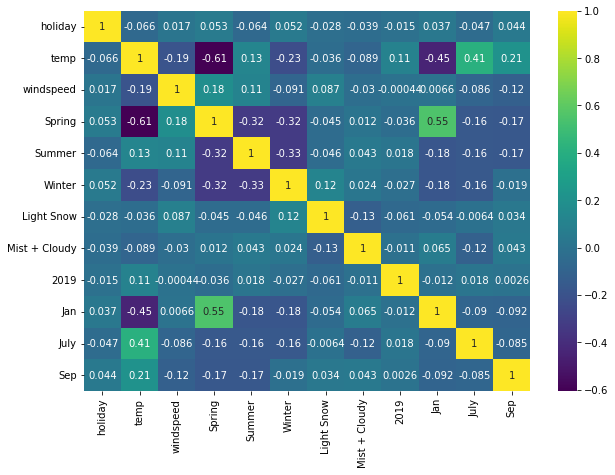

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True, cmap='viridis')

#### There still seems to be high colinearity between Spring:Jan:Temp; Let's drop Jan and Spring and July

##### Observations: 
* p values are all within range now, however, hum and temp seem to have some multicollinearity. Let's drop hum

### 3.2.5 Model V

In [50]:
X_train.drop(columns = ['Jan','July'], inplace=True)

In [51]:
model_summary(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.47e-186
Time:                        10:07:34   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1909      0.030      6.447      0.000       0.133       0.249
holiday          -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp              0.4777      0.033     14.423      0.000       0.413       0.543
windspeed        -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Spring           -0.0554      0.021     -2.654      0.008      -0.096      -0.014
Summer            0.0621      0.014      4.350      0.000       0.034       0.090
Winter            0.0945      0.017      5.630      0.000       0.062       0.127
Light Snow       -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist + Cloudy    -0.0787      0.009     -8.938      0.000      -0.096      -0.061
2019              0.2341      0.008     28.237      0.000       0.218       0.250
Sep               0.0910      0.016      5.566      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_func(X_train)

,Features,VIF
2,windspeed,4.595481
1,temp,3.837542
8,2019,2.066259
3,Spring,1.993961
4,Summer,1.902953
5,Winter,1.629128
7,Mist + Cloudy,1.549228
9,Sep,1.228982
6,Light Snow,1.081103
0,holiday,1.042654


### All p values now suggest remaining columns are significant;  VIF values are also well within range
___

## 4. Model Analysis/Accuracy

### 4.1 Predict

In [53]:
# Adding constant
X_train_sm = sm.add_constant(X_train)

# Model instance
mlr = sm.OLS(y_train, X_train_sm)

#fit
mlr_model = mlr.fit()

#mlr_model.summary()

In [54]:
y_train_pred = mlr_model.predict(X_train_sm)

### 4.2 Verifying assumptions of linear regression 
#### Residual Analysis

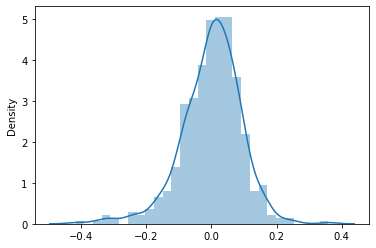

In [55]:
res = (y_train - y_train_pred) 
sns.distplot(res)
plt.show()

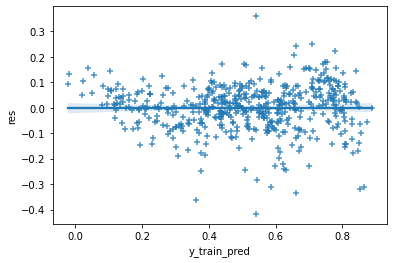

In [56]:
res_df = pd.DataFrame()
res_df['res']  = res
res_df['y_train_pred']  = y_train_pred
res_df

sns.regplot(x='y_train_pred',y='res', data=res_df, color=None, marker = '+')
plt.show()

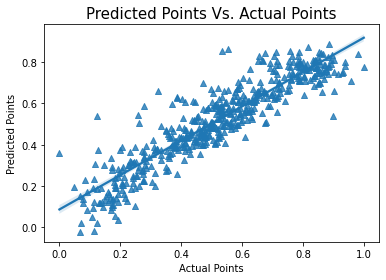

In [57]:
sns.regplot(x=y_train, y=y_train_pred, marker='^')
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points', fontdict={'fontsize': 10})
plt.show()

#### All the assumptions of Linear regression are validated
___

In [58]:
Significant_Variables = pd.DataFrame(mlr_model.params.reset_index())
Significant_Variables.rename(columns={'index':'Features', 0:'Coef'}, inplace=True)
Significant_Variables.sort_values(by='Coef', ascending=False, inplace=True)
Significant_Variables

,Features,Coef
2,temp,0.477737
9,2019,0.234132
0,const,0.190855
6,Winter,0.094476
10,Sep,0.090998
5,Summer,0.062076
4,Spring,-0.055406
8,Mist + Cloudy,-0.078741
1,holiday,-0.096316
3,windspeed,-0.148098


### R2 for Training Data

In [59]:
r2_score_train = r2_score(y_true = y_train, y_pred = y_train_pred)
r2_score_train

0.8327073211549113

___

## 5. Model Prediction and evaluation (on test data)

### 5.1 Application of model on Test Data 

In [60]:
num_vars = ['temp','hum','windspeed','cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.551340,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.187620,0.459303,0.233187,0.184403,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.046591,0.084665,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.416134,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.535676,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.682271,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,1.002662,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [62]:
X_test_f = X_test[X_train.columns]

In [63]:
X_test_sm = sm.add_constant(X_test_f)
y_test_pred = mlr_model.predict(X_test_sm)

### 5.2 Verifying assumptions of linear regression 

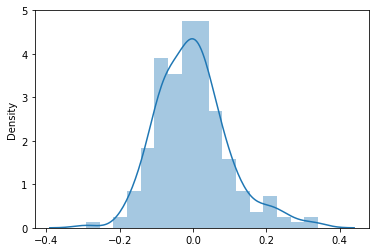

In [64]:
res1 = (y_test_pred - y_test)
sns.distplot(res1)
plt.show()

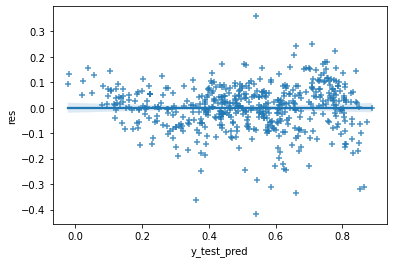

In [65]:
res_df_test = pd.DataFrame()
res_df_test['res']  = res
res_df_test['y_test_pred']  = y_train_pred
res_df_test

sns.regplot(x='y_test_pred',y='res', data=res_df_test, color=None, marker = '+')
plt.show()

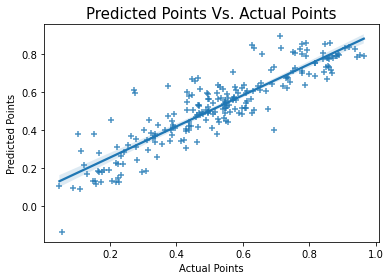

In [66]:
sns.regplot(x=y_test, y=y_test_pred, marker='+')
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 15})
plt.xlabel('Actual Points', fontdict={'fontsize': 10})
plt.ylabel('Predicted Points', fontdict={'fontsize': 10})
plt.show()

#### All the assumptions of Linear regression are validated on test set as well
___

### R2 Score for Test

In [67]:
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test

0.8038195990728842

___

In [68]:
print(X_train.columns.to_list())

['holiday', 'temp', 'windspeed', 'Spring', 'Summer', 'Winter', 'Light Snow', 'Mist + Cloudy', '2019', 'Sep']


___
## 6. Conclusion

In [69]:
print("""

Following variables/features are significant in predicting the demand for shared bikes. 
Next to it is their impact on demand:

    \n""", Significant_Variables, '\n\n r2 for training:'
      , r2_score_train, '\n r2 for test:'
      , r2_score_test
     )



Following variables/features are significant in predicting the demand for shared bikes. 
Next to it is their impact on demand:

    
          Features      Coef
2            temp  0.477737
9            2019  0.234132
0           const  0.190855
6          Winter  0.094476
10            Sep  0.090998
5          Summer  0.062076
4          Spring -0.055406
8   Mist + Cloudy -0.078741
1         holiday -0.096316
3       windspeed -0.148098
7      Light Snow -0.285031 

 r2 for training: 0.8327073211549113 
 r2 for test: 0.8038195990728842


___

___